## Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a Linear Support Vector Machine (SVM) classifier is based on finding the optimal hyperplane that separates two classes. The decision function of a linear SVM can be expressed as:

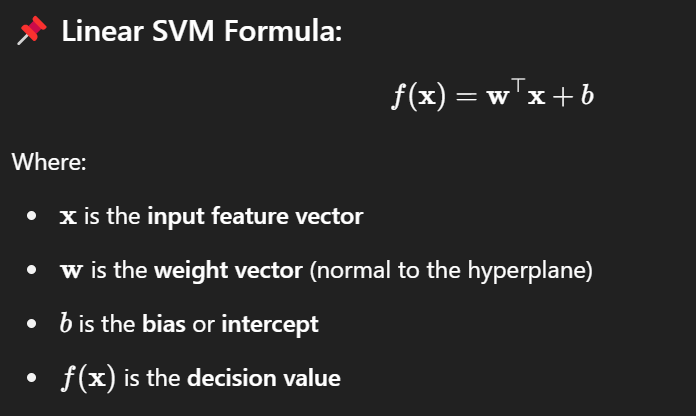

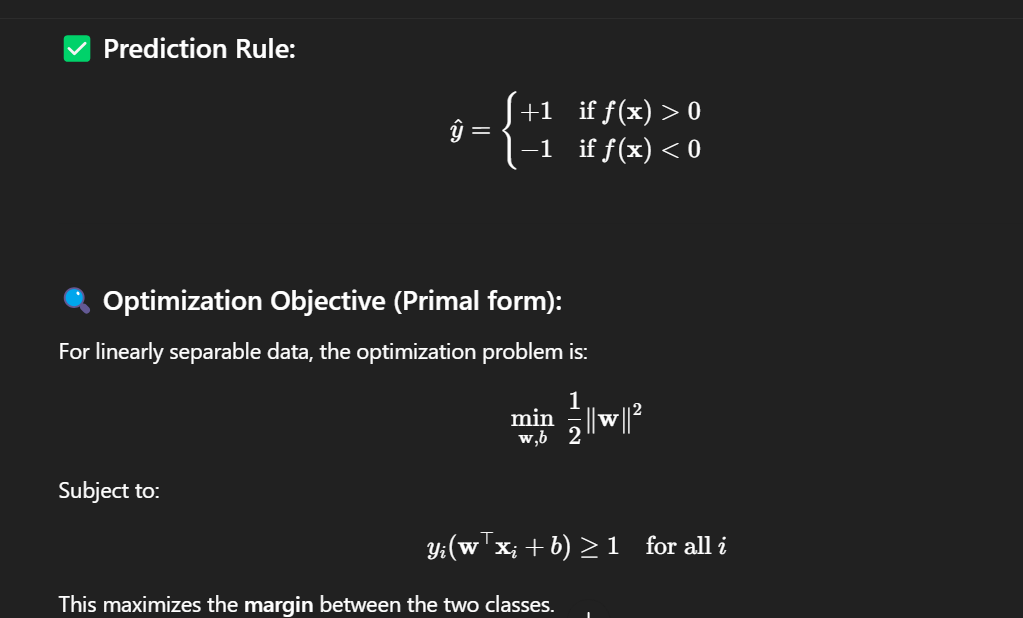

## Q2. What is the objective function of a linear SVM?


The objective of the linear SVM is to find the optimal hyperpplane the seperate the 2 or n classes accurately and make the margin in such a way that the distance betwwen the two margin is as high as possible . 


The goal is to minmize the ||w||^2/2 and plot the hyperplane accurately.

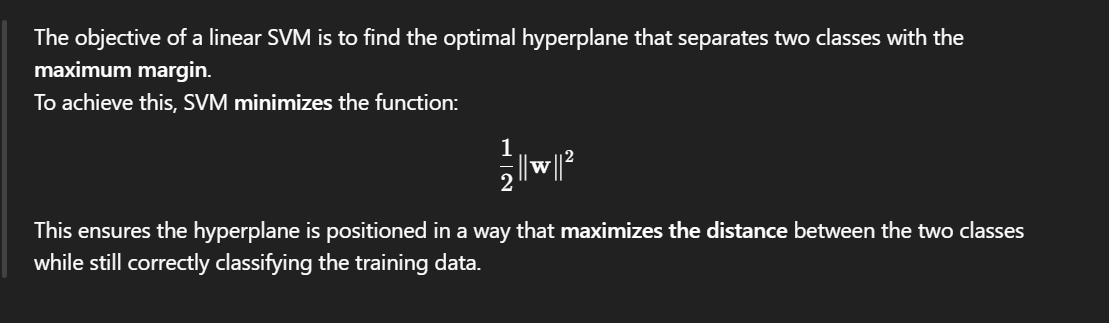

## Q3. What is the kernel trick in SVM?


In SVM there exists kernel that are used to do data transformation by changing the dimensionality of the data from 1D to 2D or 2D to 3D .By changing the dimesionality of the data the intersecting points from 2 classes or more than 2 classes can be can now be clearly distinguished and optimal hyperplane along with the marginal plane can be plotted and points can be easily classified . Kernel trick is very useful when it comes to data that is difficult to distinguish or separate because of its orientation where linear kernel fails to seperate or make boundries . By making this data transformation the dimensionlaity of the data changes making it easy to distinguish . 

The kernel trick in SVM is a mathematical technique that allows the model to implicitly map data from a lower-dimensional space to a higher-dimensional space without explicitly transforming the data. This helps SVM handle non-linearly separable data by making it linearly separable in the transformed feature space.

There are different types of kernel available : Eg : Poly , RBF, Sigmoid , Linear

## Q4. What is the role of support vectors in SVM Explain with example

The role of support vectors is to decide the orientaation of the marginal line . The support vectors are those points that are close to the marginla line ,. These support vectors decide  where exactly margin is to be drean, if the support vecto changes its position the margins along the hyperplanes orientation gets disturnbed and the model changes its overall orientation . Overall the support vectors are teh most import in decideng the margin lines and hyperplane 


Support vector lies on the margin and this points are used as a refreence to make these margin line and hyperplane.

Importantly, only these support vectors affect the model; the rest of the training data has no influence once the optimal hyperplane is found.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

✅ Hard Margin SVM:
Used when the data is perfectly linearly separable.

All data points are outside or on the margin, and none are misclassified.

Only the points exactly on the margin are called support vectors.

These support vectors define the margin.

✅ Soft Margin SVM:
Used when the data is not perfectly separable (real-world case).

Some points:

Lie on the margin (these are still support vectors).

Lie inside the margin (closer to the hyperplane — these are also support vectors).

Are misclassified (on the wrong side of the hyperplane) — these are also considered support vectors.

💡 Final Answer:
Yes, in the soft margin SVM, all points that lie on, inside, or even beyond the margin (i.e., misclassified points) and that influence the decision boundary are considered support vectors.




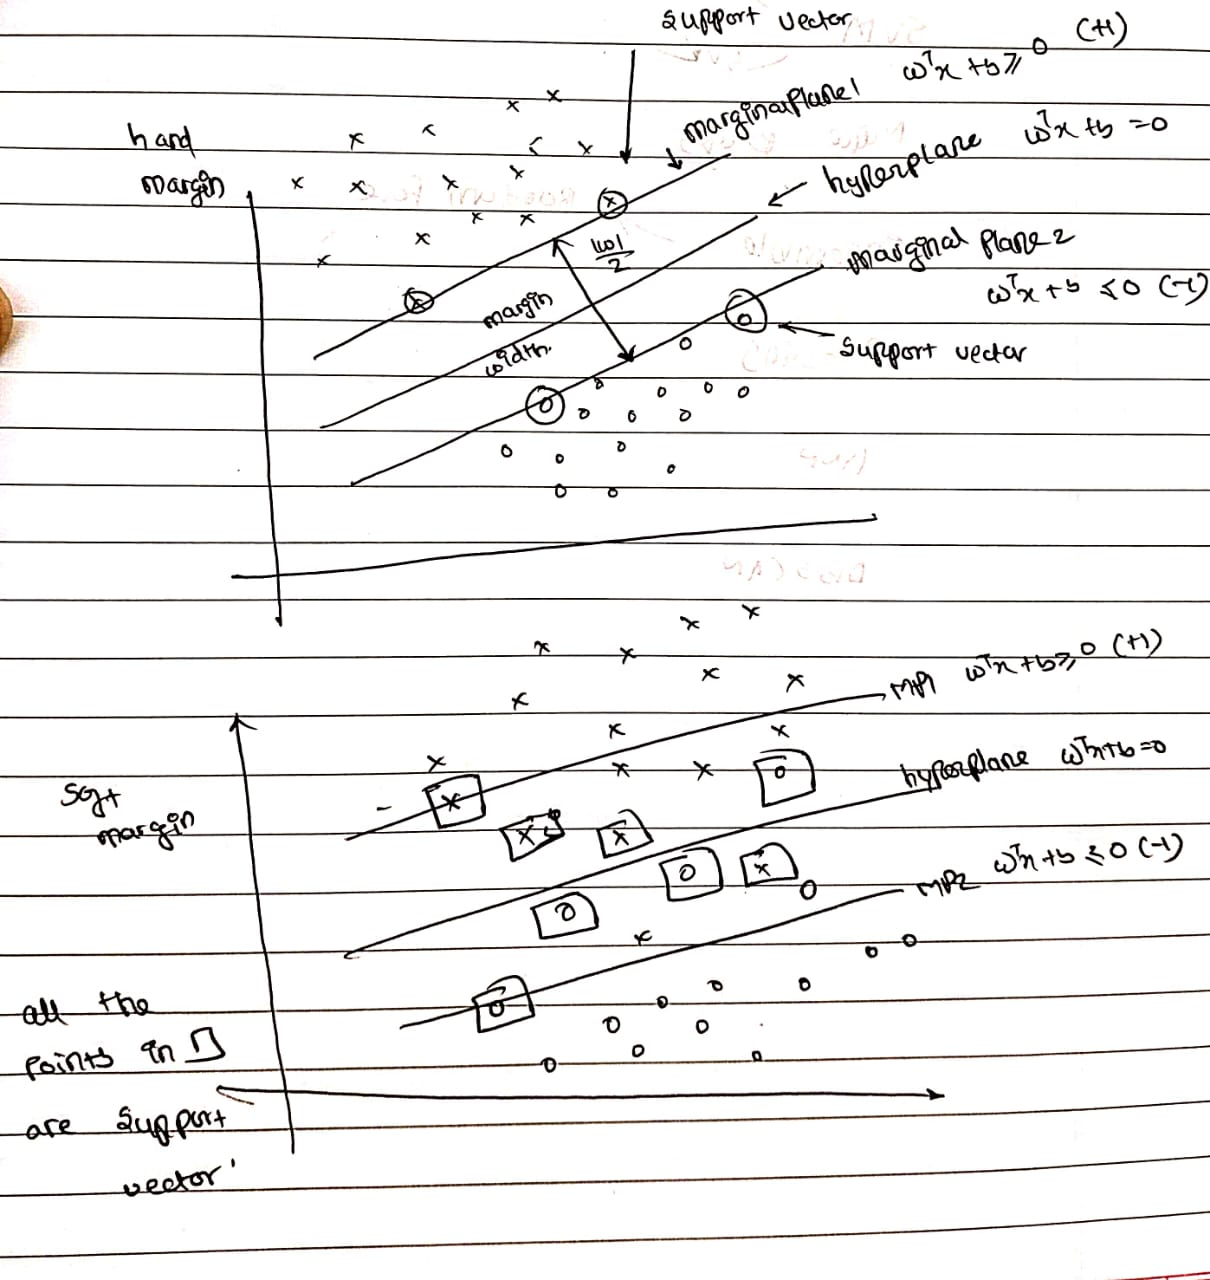

# Q6. SVM Implementation through Iris dataset.
.

-  Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different

In [1]:
from sklearn import datasets

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=datasets.load_iris()

In [7]:
type(data)

sklearn.utils._bunch.Bunch

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
X=pd.DataFrame(data = data['data'] , columns = data['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y=pd.DataFrame(data=data['target'] , columns=['Species'] )

In [22]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [25]:
df=pd.concat([X , y] , axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
from sklearn.svm import SVC

In [28]:
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.001],         # Kernel coefficient
    'degree': [2, 3, 4, 5]                # Used only for 'poly' kernel
}


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
gscv=GridSearchCV(SVC() , param_grid=param_grid  ,  refit=True , cv=5 , verbose=2)
gscv

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [32]:
print(X_train.shape ,y_train.shape)
print(X_test.shape ,y_test.shape)

(105, 4) (105, 1)
(45, 4) (45, 1)


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
gscv.fit(X_train , y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=sca

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [44]:
gscv.best_score_

0.9714285714285715

In [45]:
model=SVC(C=1 , degree=3 , gamma='scale' , kernel='poly' , probability=True)
model.fit(X_train , y_train)

SVC(C=1, kernel='poly', probability=True)

In [46]:
y_pred=model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test  , y_pred))

0.9777777777777777


In [51]:
from sklearn.metrics import classification_report , confusion_matrix , precision_score , recall_score 

In [54]:
print(classification_report(y_test  , y_pred))
print(confusion_matrix(y_test  , y_pred))
print(precision_score(y_test  , y_pred , average='weighted'))
print(recall_score(y_test  , y_pred , average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
0.9793650793650793
0.9777777777777777


In [55]:
from sklearn.metrics import roc_curve  , auc , roc_auc_score

In [56]:
y_proba=model.predict_proba(X_test)

array([[5.12076224e-03, 9.05739333e-01, 8.91399052e-02],
       [9.27779404e-01, 4.47757616e-02, 2.74448344e-02],
       [1.46478810e-10, 1.75772209e-10, 1.00000000e+00],
       [1.07355160e-02, 8.28236417e-01, 1.61028067e-01],
       [2.46118811e-03, 8.76411260e-01, 1.21127552e-01],
       [9.20955015e-01, 5.20029153e-02, 2.70420699e-02],
       [5.69881092e-02, 9.17628102e-01, 2.53837889e-02],
       [3.66953285e-03, 3.74962523e-02, 9.58834215e-01],
       [2.80703385e-02, 4.67250217e-01, 5.04679444e-01],
       [2.29865192e-02, 9.48455531e-01, 2.85579503e-02],
       [5.83980322e-03, 1.88401510e-01, 8.05758687e-01],
       [9.21757293e-01, 5.30506547e-02, 2.51920519e-02],
       [9.45810140e-01, 3.22857222e-02, 2.19041379e-02],
       [9.18494862e-01, 5.54058555e-02, 2.60992823e-02],
       [9.41325123e-01, 3.47327660e-02, 2.39421106e-02],
       [3.33058241e-03, 8.95697586e-01, 1.00971832e-01],
       [1.08428555e-03, 1.90975227e-03, 9.97005962e-01],
       [3.08132569e-02, 9.30085

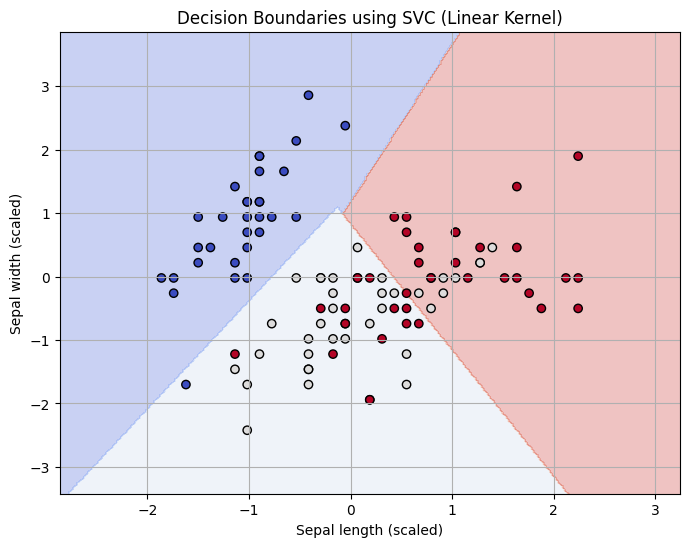

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take the first two features
y = iris.target
target_names = iris.target_names

# Split and scale the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVC
clf = SVC(kernel='linear', C=1, decision_function_shape='ovr')
clf.fit(X_train, y_train)

# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.title('Decision Boundaries using SVC (Linear Kernel)')
plt.grid(True)
plt.show()
